In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt

# plt.rcParams['backend'] = "qt4agg"
# plt.rcParams['backend.qt4'] = "PySide"


data = pd.read_csv('all_orders_3_year.tsv', delimiter = '\t' \
            , dtype = {'order_typ_new': 'str',\
                       'order_typ_old': 'str'
                       })


data['new_group_mismatch'] = np.where(data['order_typ_old'] != data['order_typ_new'], 'mismatch', '+')

data_mismatch = data[data['new_group_mismatch'] == 'mismatch']

all_ds_orders = data_mismatch['order_id'].count()
ds_to_all = data_mismatch['order_id'].count() / data['order_id'].count()
change_in_express = (data_mismatch['order_id'].count() + \
                    data[data['order_typ_old'].str.contains('Экспресс')]['order_id'].count()) \
                     / data[data['order_typ_old'].str.contains('Экспресс')]['order_id'].count() - 1


print("Всего заказов поменяли категорию: {a} \
       \n Итого изменили группу: {b} \
       \n Увеличили экспресс группу на : {c} \
       ".format(a=all_ds_orders, b=ds_to_all, c=change_in_express))

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Всего заказов поменяли категорию: 11881        
 Итого изменили группу: 0.010515248038956246        
 Увеличили экспресс группу на : 0.16730032668694372        


In [4]:
# group categories to analyse
data_mismatch_group_by_type = data_mismatch.groupby('order_typ_old', as_index = False)['order_id'].count()
data_mismatch_group_by_newtype = data_mismatch.groupby('order_typ_new', as_index = False)['order_id'].count()
data_mismatch_group_by_month = data_mismatch.groupby('month_receivd', as_index = False)['order_id'].count()
data_mismatch_group_by_aim = data_mismatch.groupby('aimi', as_index = False)['order_id'].count()
data_mismatch_country = data_mismatch.groupby('country', as_index = False)['order_id'].count()
data_mismatch_sz = data_mismatch.groupby('sz', as_index = False)['order_id'].count()

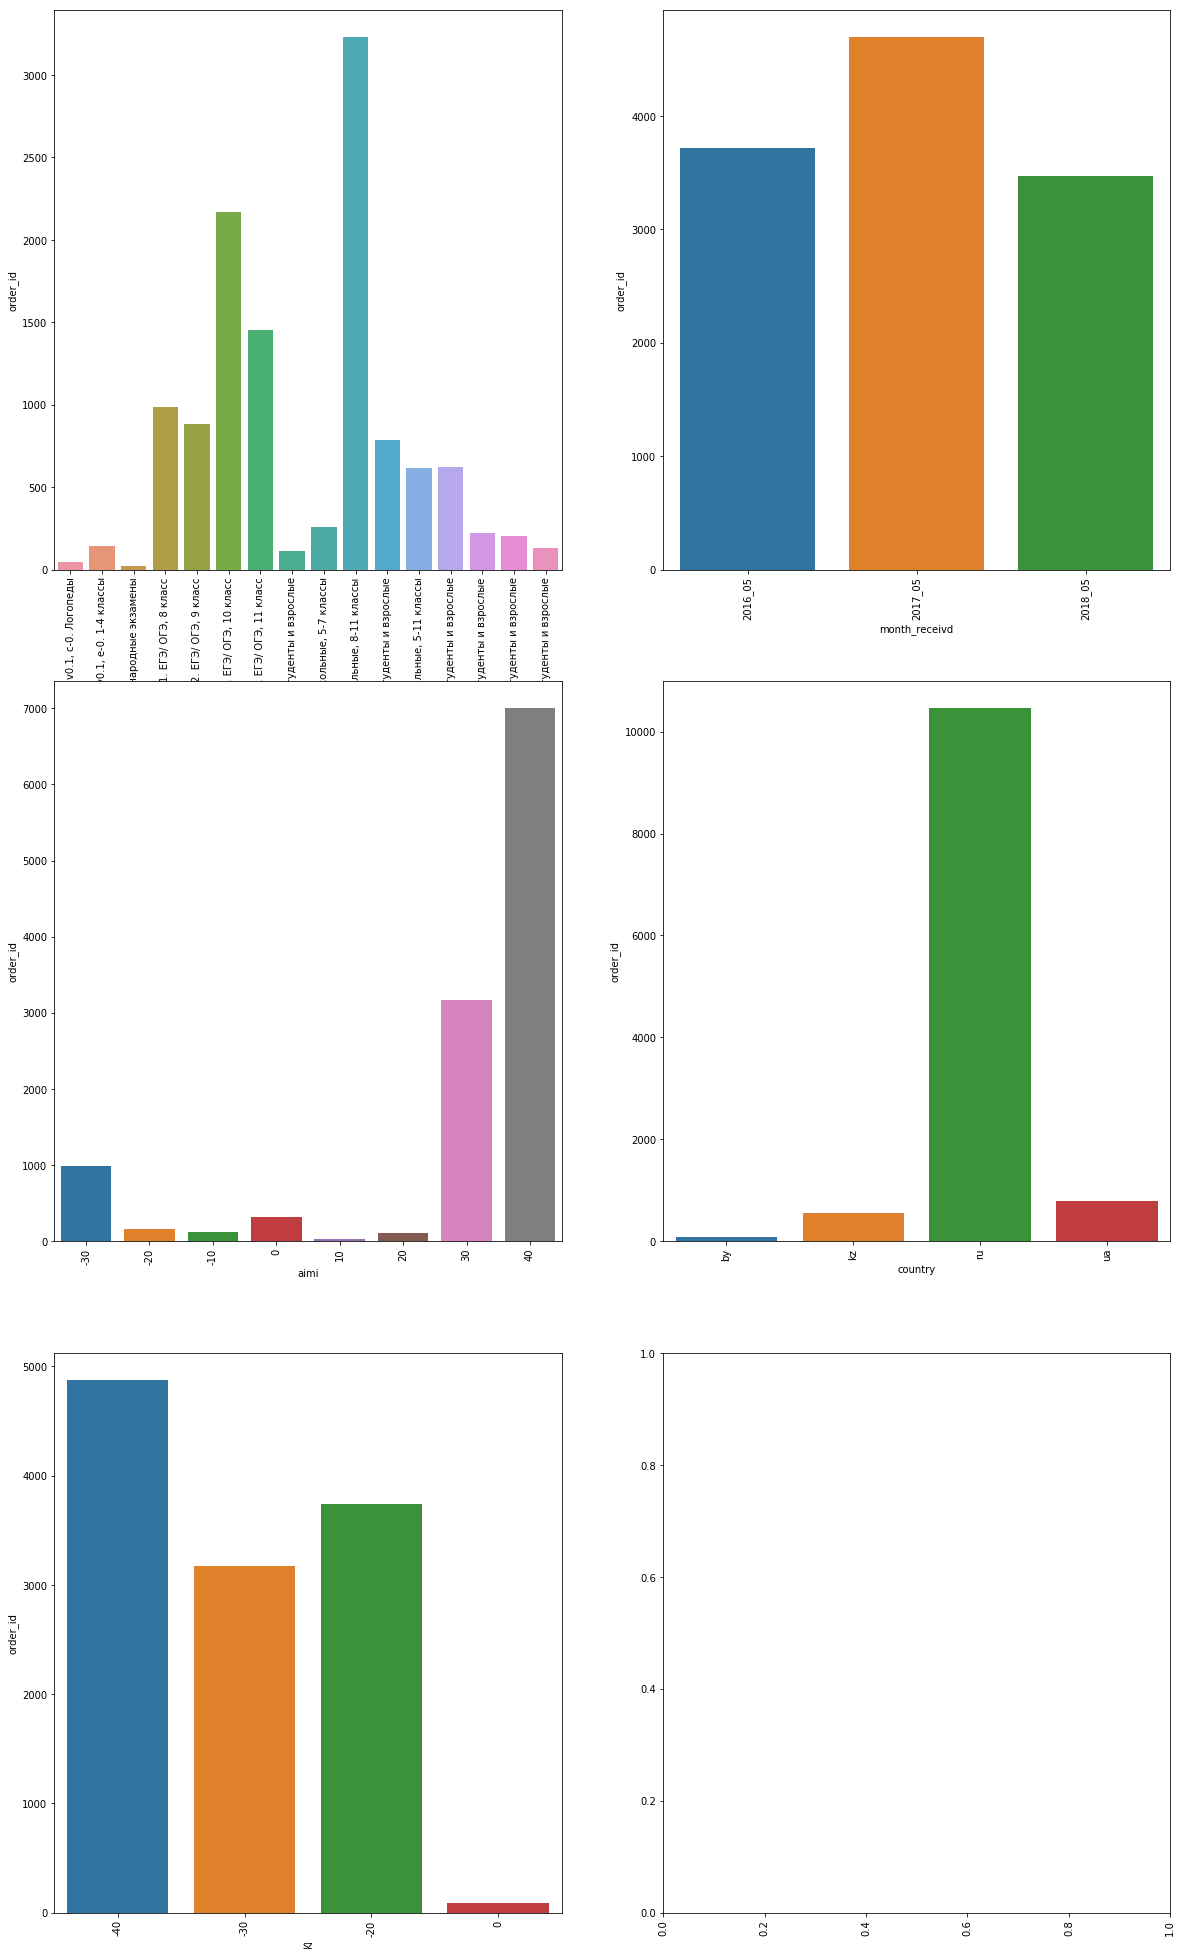

In [6]:
fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(20,35))
# sns.set_style("darkgrid")
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)
q = sns.barplot(x='order_typ_old', y='order_id', data=data_mismatch_group_by_type, ax = axes[0][0])
# axes[0][0].set_xticklabels(q.get_xticklabels(), rotation=90)
sns.barplot(x='month_receivd', y='order_id', data=data_mismatch_group_by_month, ax = axes[0][1])
sns.barplot(x='aimi', y='order_id', data=data_mismatch_group_by_aim, ax = axes[1][0])
sns.barplot(x='country', y='order_id', data=data_mismatch_country, ax = axes[1][1])
sns.barplot(x='sz', y='order_id', data=data_mismatch_sz, ax = axes[2][0])


# sns.barplot(x='order_typ_new', y='order_id', data=data_mismatch_group_by_newtype, ax = axes[2][1])
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
# plt.savefig('data_mismatch_group_by_type.pdf')

# plot_2 = 
# plt.savefig('data_mismatch_group_by_month.pdf')
# plt.figure(figsize=(6,5))
# plot_3 = 
# plt.savefig('data_mismatch_group_by_aim.pdf')
# plt.figure(figsize=(6,5))
# plot_4 = sns.barplot(x='country', y='order_id', data=data_mismatch_country)
# plt.savefig('data_mismatch_country.pdf')
# plt.figure(figsize=(6,5))
# plot_5 = sns.barplot(x='sz', y='order_id', data=data_mismatch_sz)
# plt.savefig('data_mismatch_sz.pdf')
# plt.figure(figsize=(6,5))
# plot_6 = sns.barplot(x='order_typ_new', y='order_id', data=data_mismatch_group_by_type_new)
# plot_6.set_xticklabels(plot_6.get_xticklabels(), rotation=90)
# plt.savefig('data_mismatch_order_typ_new.pdf')

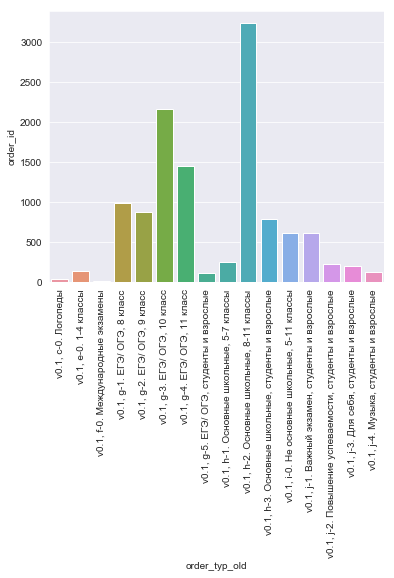

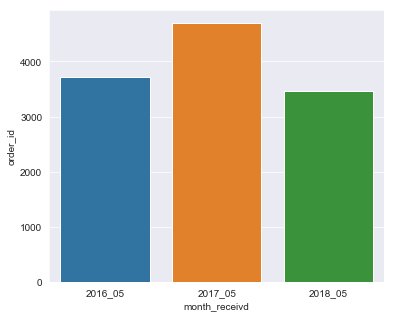

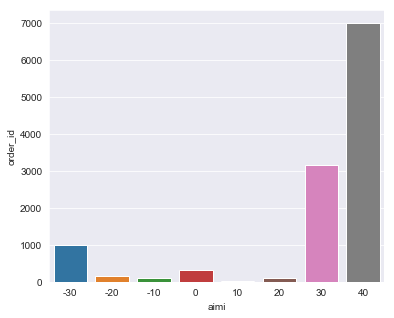

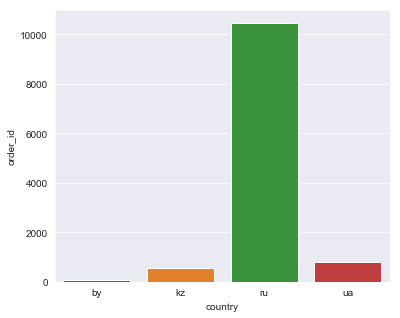

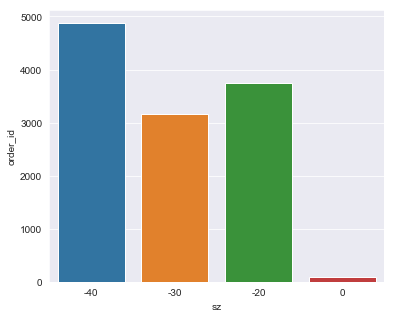

In [3]:
plt.figure(figsize=(6,5))
sns.set_style("darkgrid")
plot_1 = sns.barplot(x='order_typ_old', y='order_id', data=data_mismatch_group_by_type)
plot_1.set_xticklabels(plot_1.get_xticklabels(), rotation=90)
plt.savefig('data_mismatch_group_by_type.pdf')
plt.figure(figsize=(6,5))
plot_2 = sns.barplot(x='month_receivd', y='order_id', data=data_mismatch_group_by_month)
plt.savefig('data_mismatch_group_by_month.pdf')
plt.figure(figsize=(6,5))
plot_3 = sns.barplot(x='aimi', y='order_id', data=data_mismatch_group_by_aim)
plt.savefig('data_mismatch_group_by_aim.pdf')
plt.figure(figsize=(6,5))
plot_4 = sns.barplot(x='country', y='order_id', data=data_mismatch_country)
plt.savefig('data_mismatch_country.pdf')
plt.figure(figsize=(6,5))
plot_5 = sns.barplot(x='sz', y='order_id', data=data_mismatch_sz)
plt.savefig('data_mismatch_sz.pdf')
# plt.figure(figsize=(6,5))
# plot_6 = sns.barplot(x='order_typ_new', y='order_id', data=data_mismatch_group_by_type_new)
# plot_6.set_xticklabels(plot_6.get_xticklabels(), rotation=90)
# plt.savefig('data_mismatch_order_typ_new.pdf')

In [ ]:
plt.clf()
plt.figure(figsize=(6,5))
plot_7 = sns.barplot(x='order_typ_new', y='order_id', data=data_mismatch_group_by_newtype)
plt.savefig('data_mismatch_group_by_newtype1.pdf')

In [20]:
data_mismatch[data_mismatch['order_typ_new'] == 'DS, Экспресс, 8-11 классы, май'].sample(n=20)

,month_id,order_id,receivd,month_receivd,study_year,kz,price,price0,stoim,wprice,...,aim_ege_typ,ege_typ,word_ex_typ,music_typ,logoped_typ,order_typ_old,order_typ_new,country,city_id,new_group_mismatch
279185,5,6105404,2016-05-23 08:34:29,2016_05,2015/2016 s.y.,0,1200.0,1200.0,700,467,...,1,1.0,0.0,0.0,0.0,"v0.1, g-2. ЕГЭ/ ОГЭ, 9 класс","DS, Экспресс, 8-11 классы, май",ru,irkutsk,mismatch
282893,5,6143978,2016-05-28 17:52:32,2016_05,2015/2016 s.y.,0,260.0,260.0,150,100,...,0,0.0,0.0,0.0,0.0,"v0.1, h-2. Основные школьные, 8-11 классы","DS, Экспресс, 8-11 классы, май",ua,kiev,mismatch
268260,5,5991778,2016-05-01 11:46:04,2016_05,2015/2016 s.y.,0,1050.0,1050.0,700,467,...,0,0.0,0.0,0.0,0.0,"v0.1, h-2. Основные школьные, 8-11 классы","DS, Экспресс, 8-11 классы, май",ru,rnd,mismatch
650363,5,8896348,2017-05-02 18:48:04,2017_05,2016/2017 s.y.,0,1000.0,1000.0,700,467,...,1,1.0,0.0,0.0,0.0,"v0.1, g-4. ЕГЭ/ ОГЭ, 11 класс","DS, Экспресс, 8-11 классы, май",ru,rnd,mismatch
275266,5,6065759,2016-05-16 13:16:05,2016_05,2015/2016 s.y.,0,900.0,900.0,500,500,...,1,1.0,0.0,0.0,0.0,"v0.1, g-1. ЕГЭ/ ОГЭ, 8 класс","DS, Экспресс, 8-11 классы, май",ru,sochi,mismatch
284223,5,6157140,2016-05-30 22:58:03,2016_05,2015/2016 s.y.,0,6400.0,6400.0,4000,2000,...,1,1.0,0.0,0.0,0.0,"v0.1, g-1. ЕГЭ/ ОГЭ, 8 класс","DS, Экспресс, 8-11 классы, май",ru,msk,mismatch
270533,5,6016113,2016-05-06 13:55:24,2016_05,2015/2016 s.y.,0,260.0,260.0,180,120,...,0,0.0,0.0,1.0,0.0,"v0.1, i-0. Не основные школьные, 5-11 классы","DS, Экспресс, 8-11 классы, май",ua,kiev,mismatch
281986,5,6133463,2016-05-26 23:21:32,2016_05,2015/2016 s.y.,0,1400.0,1400.0,800,533,...,0,0.0,0.0,0.0,0.0,"v0.1, h-2. Основные школьные, 8-11 классы","DS, Экспресс, 8-11 классы, май",ru,msk,mismatch
271702,5,6028979,2016-05-10 10:52:32,2016_05,2015/2016 s.y.,0,3100.0,3100.0,2500,1250,...,1,0.0,0.0,0.0,0.0,"v0.1, g-4. ЕГЭ/ ОГЭ, 11 класс","DS, Экспресс, 8-11 классы, май",ru,web,mismatch
271820,5,6030592,2016-05-10 13:38:38,2016_05,2015/2016 s.y.,0,1000.0,1000.0,600,600,...,0,0.0,0.0,0.0,0.0,"v0.1, h-2. Основные школьные, 8-11 классы","DS, Экспресс, 8-11 классы, май",ru,msk,mismatch


In [11]:
data_mismatch['order_typ_new'].value_counts()

DS, Экспресс, 8-11 классы, май                         9360
DS, Студенты, остальные, май                           1208
DS, Студенты, уровень знаний больше начального, май     889
DS, Школьники, 1-7 класс, май                           424
Name: order_typ_new, dtype: int64

In [19]:
data_mismatch[data_mismatch['order_typ_new'] == 'DS, Экспресс, 8-11 классы, май']

,month_id,order_id,receivd,month_receivd,study_year,kz,price,price0,stoim,wprice,...,aim_ege_typ,ege_typ,word_ex_typ,music_typ,logoped_typ,order_typ_old,order_typ_new,country,city_id,new_group_mismatch
268223,5,5991179,2016-05-01 00:09:10,2016_05,2015/2016 s.y.,1,1500.00,4400.00,3000,1500,...,0,0.0,0.0,0.0,0.0,"v0.1, g-1. ЕГЭ/ ОГЭ, 8 класс","DS, Экспресс, 8-11 классы, май",ru,msk,mismatch
268233,5,5991334,2016-05-01 07:38:00,2016_05,2015/2016 s.y.,0,950.00,950.00,750,500,...,0,0.0,0.0,0.0,0.0,"v0.1, h-2. Основные школьные, 8-11 классы","DS, Экспресс, 8-11 классы, май",ru,prm,mismatch
268238,5,5991415,2016-05-01 09:09:43,2016_05,2015/2016 s.y.,-10,1150.00,1150.00,800,533,...,1,1.0,0.0,0.0,0.0,"v0.1, g-1. ЕГЭ/ ОГЭ, 8 класс","DS, Экспресс, 8-11 классы, май",ru,nsk,mismatch
268246,5,5991633,2016-05-01 10:50:38,2016_05,2015/2016 s.y.,0,1100.00,1100.00,750,500,...,1,1.0,0.0,0.0,0.0,"v0.1, g-2. ЕГЭ/ ОГЭ, 9 класс","DS, Экспресс, 8-11 классы, май",ru,ksdr,mismatch
268249,5,5991649,2016-05-01 10:57:43,2016_05,2015/2016 s.y.,4,700.00,700.00,600,400,...,1,1.0,0.0,0.0,0.0,"v0.1, g-4. ЕГЭ/ ОГЭ, 11 класс","DS, Экспресс, 8-11 классы, май",ru,web,mismatch
268250,5,5991658,2016-05-01 11:01:16,2016_05,2015/2016 s.y.,0,1150.00,1150.00,700,467,...,0,0.0,0.0,0.0,0.0,"v0.1, h-2. Основные школьные, 8-11 классы","DS, Экспресс, 8-11 классы, май",ru,kaliningrad,mismatch
268258,5,5991768,2016-05-01 11:44:15,2016_05,2015/2016 s.y.,0,1050.00,1050.00,800,533,...,1,1.0,0.0,0.0,0.0,"v0.1, g-4. ЕГЭ/ ОГЭ, 11 класс","DS, Экспресс, 8-11 классы, май",ru,web,mismatch
268260,5,5991778,2016-05-01 11:46:04,2016_05,2015/2016 s.y.,0,1050.00,1050.00,700,467,...,0,0.0,0.0,0.0,0.0,"v0.1, h-2. Основные школьные, 8-11 классы","DS, Экспресс, 8-11 классы, май",ru,rnd,mismatch
268266,5,5991820,2016-05-01 11:57:11,2016_05,2015/2016 s.y.,0,950.00,950.00,600,400,...,1,1.0,0.0,0.0,0.0,"v0.1, g-3. ЕГЭ/ ОГЭ, 10 класс","DS, Экспресс, 8-11 классы, май",ru,kemerovo,mismatch
268270,5,5991846,2016-05-01 12:04:31,2016_05,2015/2016 s.y.,0,1400.00,1400.00,1000,667,...,1,1.0,0.0,0.0,0.0,"v0.1, g-4. ЕГЭ/ ОГЭ, 11 класс","DS, Экспресс, 8-11 классы, май",ru,krsk,mismatch


In [3]:
exercise = sns.load_dataset("exercise")
exercise

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest
5,5,2,low fat,93,30 min,rest
6,6,3,low fat,97,1 min,rest
7,7,3,low fat,97,15 min,rest
8,8,3,low fat,94,30 min,rest
9,9,4,low fat,80,1 min,rest
